In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit3/table_8_offenses_known_to_law_enforcement_california_by_city_2013.csv')
crime.columns = ['city', 'population','violent_crime','murder','rape','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']
print(crime.shape)
crime.head()

(462, 12)


,city,population,violent_crime,murder,rape,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
0,Adelanto,"31,165",198,2,15,52,129,886,381,372,133,17
1,Agoura Hills,"20,762",19,0,2,10,7,306,109,185,12,7
2,Alameda,"76,206",158,0,10,85,63,"1,902",287,"1,285",330,17
3,Albany,"19,104",29,0,1,24,4,557,94,388,75,7
4,Alhambra,"84,710",163,1,9,81,72,"1,774",344,"1,196",234,7


### Data Cleaning

In [3]:
for col in ['population','violent_crime','murder','rape','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']:
    crime[col] = crime[col].apply(lambda x: str(x).replace(',',''))
   
for col in ['population','violent_crime','murder','rape','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']:
    crime[col] = pd.to_numeric(crime[col])
    
crime = crime[crime['murder'] < 80]
crime = crime[crime['larceny'] < 15000]
crime = crime[crime['property_crime'] < 20000]


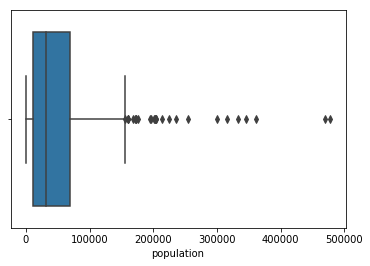

52038.59649122807


count       456.000000
mean      52038.596491
std       62248.738694
min         115.000000
25%       11786.000000
50%       31015.500000
75%       69660.250000
max      478182.000000
Name: population, dtype: float64

In [4]:
sns.boxplot(x=crime['population'])
plt.show()

print(np.mean(crime['population']))
crime['population'].describe()

### Feature Engineering

In [5]:
crime['Pop100'] = np.where(crime['population'] > 30000, 1, 0)
crime['larcenysqrt'] = crime['larceny'].apply(lambda x: np.sqrt(x))

X = crime.drop(['Pop100','population','city'],axis=1)
y = np.asarray(crime.Pop100)

### Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=20)

lr = linear_model.LogisticRegression(C=1e9)
fit = lr.fit(X_train,y_train)
print('Coefficients for train model')
print(fit.coef_)
print(fit.intercept_)
pred_y_train = lr.predict(X_train)

print('\n Percentage accuracy for train model:')
print(lr.score(X_train, y_train))

print('\n Percentage accuracy for test model:')
print(lr.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
print('\nCross validation scores',cross_val_score(lr, X, y, cv=10))

Coefficients for train model
[[ 0.03077883  0.02263967  0.06221954 -0.00880093 -0.04527945  0.0045702
   0.00163504  0.00724239 -0.00430724 -0.03745183 -0.28136212]]
[-0.711326]

 Percentage accuracy for train model:
0.877742946708464

 Percentage accuracy for test model:
0.8978102189781022

Cross validation scores [0.82608696 0.93478261 0.82608696 0.89130435 0.82608696 0.89130435
 0.84444444 0.82222222 0.86666667 0.95555556]


### Ridge Regression

In [7]:
ridgeregr = linear_model.Ridge(alpha=0.1,fit_intercept=False)
ridgeregr.fit(X_train, y_train)
ridgeregr.fit(X_test,y_test)

print('Coefficients for train model')
print(ridgeregr.coef_)

print('\n R-squared for train model:')
print(ridgeregr.score(X_train, y_train))

print('\n R-squared for test model:')
print(ridgeregr.score(X_test, y_test))

print('\nCross validation scores',cross_val_score(ridgeregr, X, y, cv=10))

Coefficients for train model
[-0.00082456 -0.00568398  0.00484755 -0.00039531  0.00040718  0.00014319
  0.00017884 -0.00015895  0.0001233  -0.00524181  0.01985457]

 R-squared for train model:
0.46594060589002784

 R-squared for test model:
0.5727356965887689

Cross validation scores [0.35667276 0.59687377 0.45200492 0.62909081 0.4871807  0.49612091
 0.4867945  0.45951134 0.47590153 0.70631606]


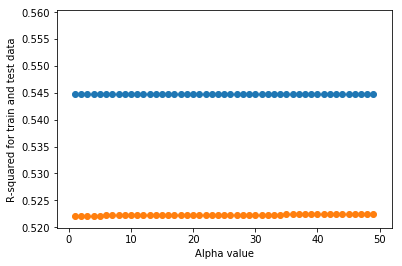

In [8]:
alpha = [range(1,50,1)]
scoretrain = []
scoretest = []
for lambd in range(1,50,1):
    ridgeregr1 = linear_model.Ridge(alpha=lambd,fit_intercept=False)
    ridgeregr1.fit(X_train, y_train)
    scoretrain.append(ridgeregr1.score(X_train, y_train))
    scoretest.append(ridgeregr1.score(X_test, y_test))

plt.scatter(alpha, scoretrain)
plt.scatter(alpha, scoretest)
plt.xlabel('Alpha value')
plt.ylabel('R-squared for train and test data')
plt.show()

### Lasso Regression

In [9]:
lassoregr = linear_model.Lasso(alpha=0)
lassoregr.fit(X_train, y_train)
lassoregr.fit(X_test,y_test)

print('Coefficients for train model')
print(lassoregr.coef_)

print('\n R-squared for train model:')
print(lassoregr.score(X_train, y_train))

print('\n R-squared for test model:')
print(lassoregr.score(X_test, y_test))

print('\nCross validation scores',cross_val_score(lassoregr, X, y, cv=10))

Coefficients for train model
[-1.83820994e-04 -1.04083810e-02 -9.30661983e-04  3.32127880e-04
  9.46955964e-05 -1.54147866e-04  3.30014169e-04 -1.88294092e-04
  1.45065077e-04 -7.27351011e-04  4.60291644e-02]

 R-squared for train model:
0.5681901592160601

 R-squared for test model:
0.6352487295093523

Cross validation scores [0.44346922 0.7109497  0.48343989 0.70181358 0.5716786  0.59884837
 0.57703529 0.44649394 0.54497992 0.7822016 ]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordin

Lasso regression works as feature selection.  It returned a coefficient of 0 for variables that are repeated in the data set.  These will be removed and the model will be run on the new data set 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization m

Coefficients for train model
[-1.15292513e-04  3.36929393e-05 -1.69107858e-04  3.01090377e-04
 -1.72305707e-04  1.39625518e-04  4.57020653e-02]

 Percentage accuracy for train model:
0.5716623170203525

 Percentage accuracy for test model:
0.6325844015288068

Cross validation scores [0.45323951 0.72329946 0.49293153 0.70360273 0.57332283 0.59570679
 0.57558932 0.44548124 0.55004584 0.77659068]


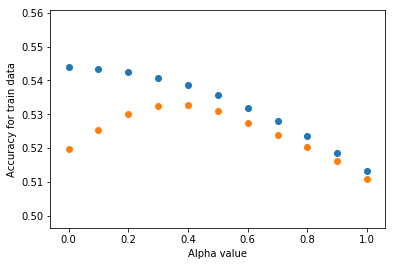

In [10]:
X_new = X.drop(['murder','rape','agg_assault','arson'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y, test_size=0.3, random_state=20)

lassoregr1 = linear_model.Lasso(alpha=0)
lassoregr1.fit(X_train1, y_train1)
lassoregr1.fit(X_test1,y_test1)

print('Coefficients for train model')
print(lassoregr1.coef_)

print('\n Percentage accuracy for train model:')
print(lassoregr1.score(X_train1, y_train1))

print('\n Percentage accuracy for test model:')
print(lassoregr1.score(X_test1, y_test1))

print('\nCross validation scores',cross_val_score(lassoregr1, X_new, y, cv=10))

#scatter plot of alpha v score.

alpha = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
scoretrain = []
scoretest = []
for lambd in alpha:
    lassoregr1 = linear_model.Lasso(alpha=lambd,fit_intercept=False)
    lassoregr1.fit(X_train1, y_train1)
    scoretrain.append(lassoregr1.score(X_train1, y_train1))
    scoretest.append(lassoregr1.score(X_test1, y_test1))
plt.scatter(alpha, scoretrain)
plt.scatter(alpha, scoretest)
plt.xlabel('Alpha value')
plt.ylabel('Accuracy for train data')
plt.show()